# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 32-> Clustering (KMeans)</p>

__K-Means__ is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the __within-cluster sum-of-squares (WCSS)__, also known as __inertia__. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached. 


## <span style='color:#ff6200'> Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

## <span style='color:#ff6200'> Generating Synthetic Dataset</span>

In [2]:
X, y = make_blobs(n_samples=3000, centers=4, cluster_std=[1.5, 1.3, 1.6, 1.2], random_state=42)

noise = np.random.randn(*X.shape) * 0.5
X_noisy = X + noise

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_noisy)

df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

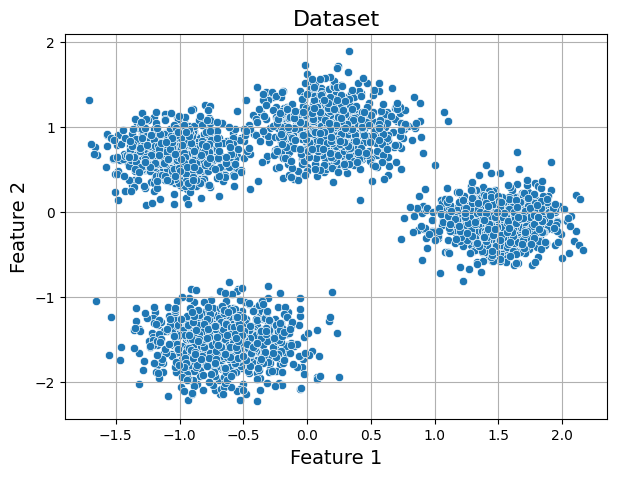

In [3]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Feature 1', y='Feature 2', data=df, palette='viridis')
plt.title('Dataset', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid(True)
plt.show()

## <span style='color:#ff6200'> Determining the Optimal Number of Clusters</span>

## <span style='color:#fcc36d'> Elbow Method </span>

The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the __inertia__ or __WCSS__ score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "__Elbow Method__". The __elbow point__ represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

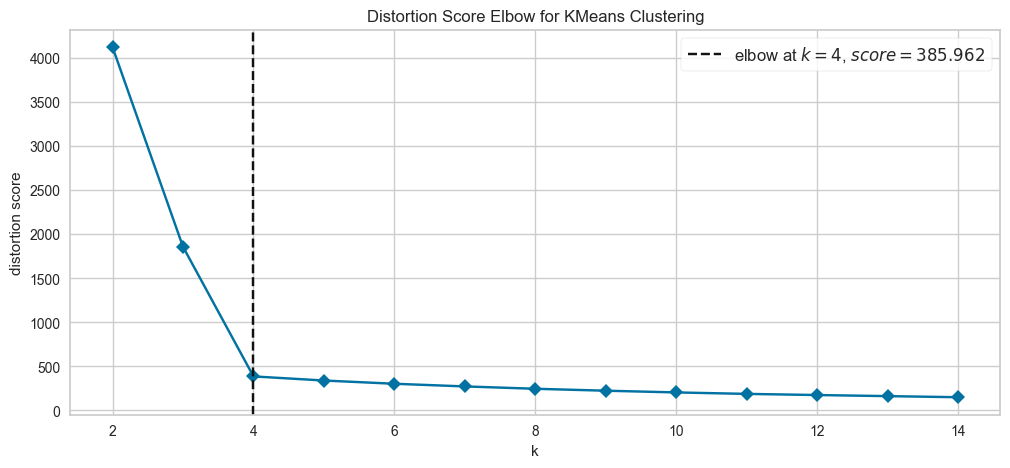

In [4]:
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})
sns.set_palette(['#ff6200'])
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)
fig, ax = plt.subplots(figsize=(12, 5))

visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)
visualizer.fit(df)
visualizer.show();

# <b><span style='color:#ff6200'> Clustering (KMeans)</span>

In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df)
from collections import Counter
cluster_frequencies = Counter(kmeans.labels_)

label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

df['cluster'] = new_labels

In [6]:
df.head()

,Feature 1,Feature 2,Target,cluster
0,-0.431121,-1.338802,2,0
1,0.197478,0.893034,0,1
2,-0.149879,0.884868,0,1
3,0.228574,1.273669,0,1
4,-1.192965,-1.180467,2,0


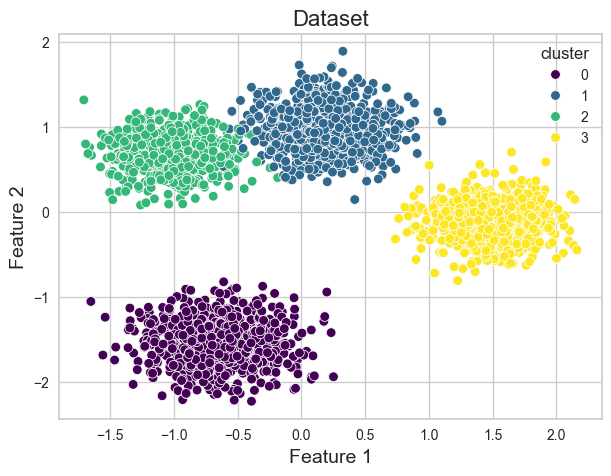

In [7]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Feature 1', y='Feature 2', hue = 'cluster', data=df, palette='viridis')
plt.title('Dataset', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid(True)
plt.show()

## <span style='color:#ff6200'> Cluster Evaluation Metrices</span>

## Davies-Bouldin Index (DBI)
The Davies-Bouldin Index (DBI) is a metric used to evaluate the quality of clusters produced by a clustering algorithm. It measures the average similarity ratio of each cluster with its most similar cluster, where similarity is defined as the average distance between points within a cluster and the distance between cluster centroids.

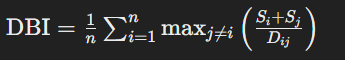

## Calinski-Harabasz Index (CHI)
The Calinski-Harabasz Index (CHI), also known as the Variance Ratio Criterion, measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. It evaluates how well-separated the clusters are and how tightly the data points are clustered within each cluster.

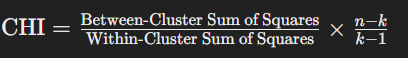


In [8]:
dbi = davies_bouldin_score(df, kmeans.labels_)
print("Davies-Bouldin Index for K-Means:", dbi)

calinski_harabasz = calinski_harabasz_score(df, kmeans.labels_)
print("Calinski-Harabasz Index for K-Means:", calinski_harabasz)

Davies-Bouldin Index for K-Means: 0.2118647257418657
Calinski-Harabasz Index for K-Means: 33932.27604623743


- A DBI value of 0.2131 is relatively low, suggesting that the clusters are well-separated and distinct from each other. This indicates that the clustering solution is likely of good quality.
- A CHI value of 33313.3138 is quite high, suggesting that the clustering solution has well-separated clusters with tight intra-cluster cohesion. This indicates that the clusters are distinct and the clustering solution is of high quality.

## Drawbacks of K means
Here are the main drawbacks of the K-means clustering algorithm and their corresponding solutions:

- 1️⃣ __Inertia is influenced by the number of dimensions__: The value of inertia tends to increase in high-dimensional spaces due to the curse of dimensionality, which can distort the Euclidean distances between data points.

> __Solution:__ Performing dimensionality reduction, such as __PCA__, before applying K-means to alleviate this issue and speed up computations.
    
___ 
    
- 2️⃣ __Dependence on Initial Centroid Placement__: The K-means algorithm might find a local minimum instead of a global minimum, based on where the centroids are initially placed.

> __Solution:__ To enhance the likelihood of locating the global minimum, we can employ the __k-means++ initialization__ method.
  
___ 
    
- 3️⃣ __Requires specifying the number of clusters__: K-means requires specifying the number of clusters (K) beforehand, which may not be known in advance.

> __Solution:__ Using methods such as the __elbow method__ and __silhouette analysis__ to estimate the optimal number of clusters.
    
___     
    
- 4️⃣ __Sensitivity to unevenly sized or sparse clusters__: K-means might struggle with clusters of different sizes or densities.

> __Solution:__ Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN.
___ 
    
- 5️⃣ __Assumes convex and isotropic clusters__: K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.
    
> __Solution:__ Considering using clustering algorithms that do not make these assumptions, such as DBSCAN or Gaussian Mixture Model (GMM).